In [4]:
import pandas as pd
from path import Path
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.mlab import normpdf
import numpy as np
sns.set_style('white')

In [5]:
data_dir = Path('../data/dump')

In [27]:
columns = ['state', 'county', 'site', 'parameter', 'poc', 'lat', 'lon', 'datum', 'parameter_name', 'date_local', 'time_local', 'date_gmt', 'time_gmt', 'measurement', 'unit', 'mdl', 'uncertainty', 'qualifier', 'method_type', 'method_code', 'method_name', 'state_name', 'county_name', 'last_change']
useful_columns = ['measurement']
def get_site_data(site):
    def get_gas(gas):
        csv = pd.read_csv(data_dir / ('%s-%s.csv' % (site, gas)), names=columns, header=None)
        csv['datetime'] = csv['date_local'] + ' ' + csv['time_local'] + ':00'
        csv.index = pd.to_datetime(csv['datetime'])
        return csv[useful_columns]
    
    gases = list(map(get_gas, ['co', 'no2', 'o3', 'temp']))
    if gases[0].shape[0] == 0:
        data = gases[1]
        data['no2'] = data['measurement']
        data = pd.merge(data, gases[2], how='inner', left_index=True, right_index=True, suffixes=('no2', 'o3'))
        data['o3'] = data['measuremento3']
        data = pd.merge(data, gases[3], how='inner', left_index=True, right_index=True)
        print(data.columns)
        data['temp'] = data['measurement']
        return data[['no2', 'o3', 'temp']]
    else:
        data = pd.merge(gases[0], gases[1], how='inner', left_index=True, right_index=True, suffixes=('co', 'no2'))
        data['co'] = data['measurementco']
        data['no2'] = data['measurementno2']
        data = pd.merge(data, gases[2], how='inner', left_index=True, right_index=True)
        data['o3'] = data['measurement']
        data = pd.merge(data, gases[3], how='inner', left_index=True, right_index=True)
        print(data.columns)
        data['temp'] = data['measurement_y']
        return data[['co', 'no2', 'o3', 'temp']]

In [28]:
elcajon = get_site_data('elcajon')
shafter = get_site_data('shafter')
donovan = get_site_data('donovan')

Index(['measurementco', 'measurementno2', 'co', 'no2', 'measurement_x', 'o3',
       'measurement_y'],
      dtype='object')
Index(['measurementno2', 'no2', 'measuremento3', 'o3', 'measurement'], dtype='object')
Index(['measurementno2', 'no2', 'measuremento3', 'o3', 'measurement'], dtype='object')


In [31]:
elcajon

,co,no2,o3,temp
datetime,,,,
2017-01-01 00:00:00,0.282,5,0.034,49
2017-01-01 01:00:00,0.342,6,0.033,48
2017-01-01 05:00:00,0.275,10,0.017,45
2017-01-01 06:00:00,0.216,7,0.021,45
2017-01-01 07:00:00,0.345,13,0.010,44
2017-01-01 08:00:00,0.330,11,0.016,47
2017-01-01 09:00:00,0.214,4,0.029,52
2017-01-01 10:00:00,0.153,1,0.040,54
2017-01-01 11:00:00,0.167,1,0.041,56


# El Cajon

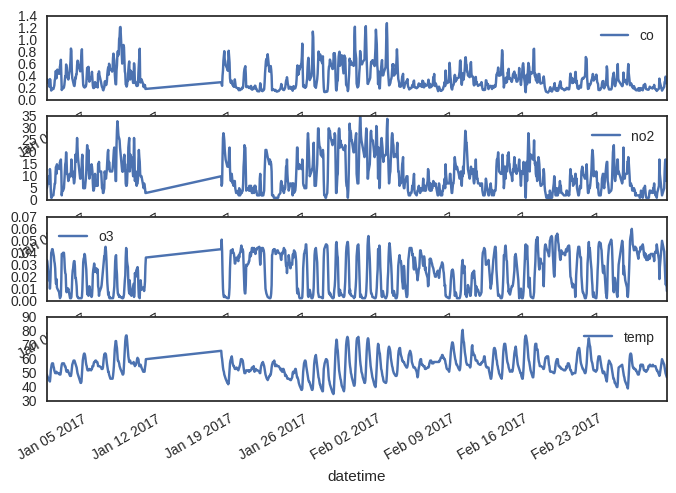

In [33]:
fig, ax = plt.subplots(4)
elcajon['co'].plot(ax=ax[0], legend=True)
elcajon['no2'].plot(ax=ax[1], legend=True)
elcajon['o3'].plot(ax=ax[2], legend=True)
elcajon['temp'].plot(ax=ax[3], legend=True)
plt.show()

# Shafter

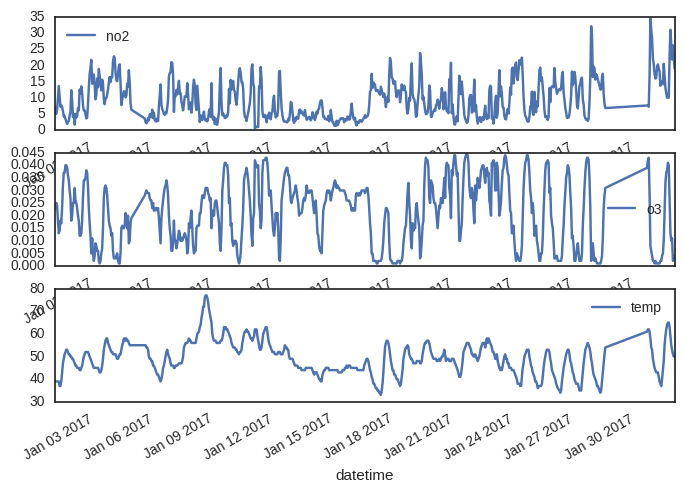

In [34]:
fig, ax = plt.subplots(3)
#shafter['co'].plot(ax=ax[0])
shafter['no2'].plot(ax=ax[0], legend=True)
shafter['o3'].plot(ax=ax[1], legend=True)
shafter['temp'].plot(ax=ax[2], legend=True)
plt.show()

# Donovan

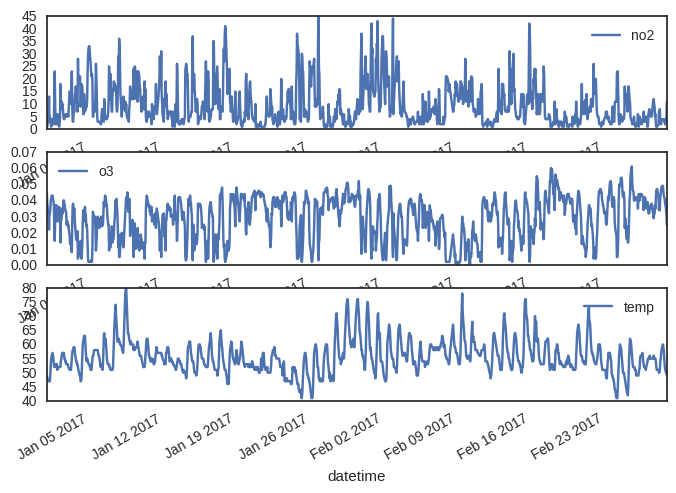

In [35]:
fig, ax = plt.subplots(3)
#shafter['co'].plot(ax=ax[0])
donovan['no2'].plot(ax=ax[0], legend=True)
donovan['o3'].plot(ax=ax[1], legend=True)
donovan['temp'].plot(ax=ax[2], legend=True)
plt.show()

In [36]:
def plot_normal(location, gas, label):
    sns.kdeplot(location[gas], label=label)
    return
    D = location.describe()
    mean = D[gas]['mean']
    std = D[gas]['std']
    var = std ** 2
    x = np.linspace(mean-3*std,mean+3*std, 100)
    plt.plot(x, normpdf(x, mean, std), label=label)

In [37]:
print("El Cajon")
print(elcajon.describe())
print("Shafter")
print(shafter.describe())
print("Donovan")
print(donovan.describe())

El Cajon
                co          no2           o3         temp
count  1056.000000  1056.000000  1056.000000  1056.000000
mean      0.358123    10.870265     0.024290    55.503788
std       0.199799     7.532629     0.015823     7.562315
min       0.120000     1.000000     0.002000    35.000000
25%       0.208750     5.000000     0.008000    51.000000
50%       0.293500     9.000000     0.026000    55.000000
75%       0.455250    16.000000     0.039000    59.000000
max       1.281000    35.000000     0.060000    81.000000
Shafter
             no2          o3        temp
count  664.00000  664.000000  664.000000
mean     9.24262    0.021562   49.207831
std      5.93793    0.012616    7.340801
min      0.50000    0.001000   33.000000
25%      4.10000    0.010000   44.000000
50%      7.70000    0.023000   49.000000
75%     13.40000    0.031000   54.000000
max     34.50000    0.045000   77.000000
Donovan
               no2           o3         temp
count  1275.000000  1275.000000  1275.0

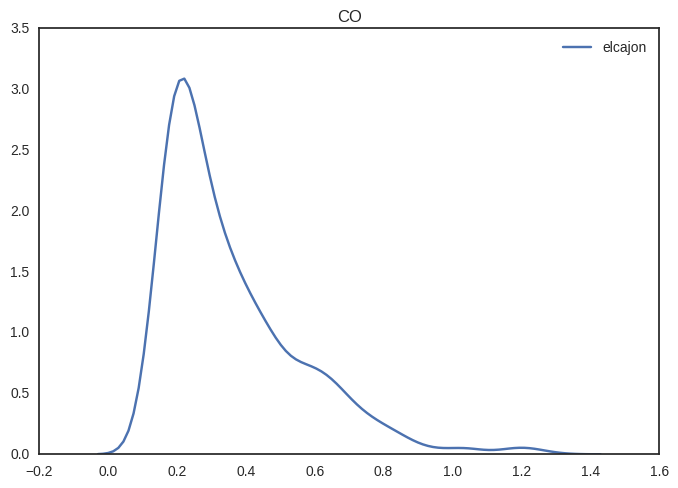

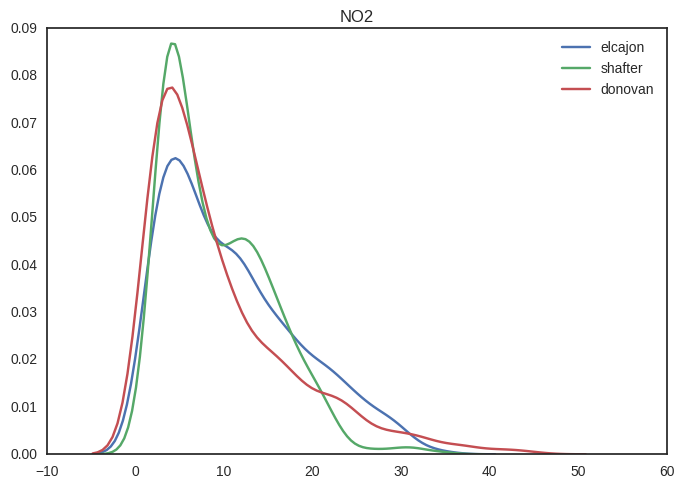

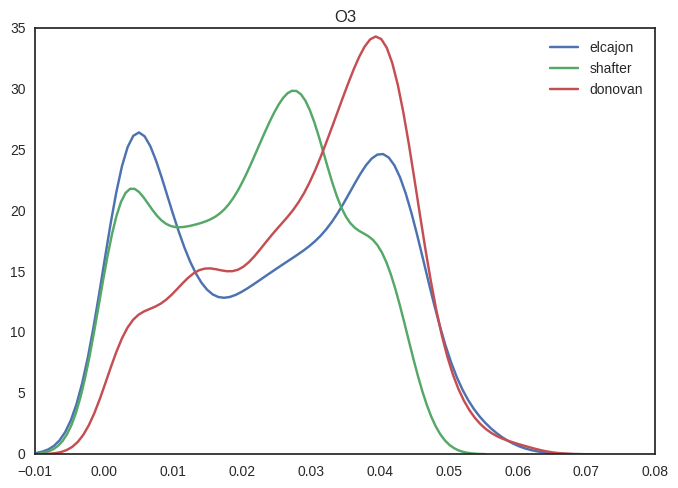

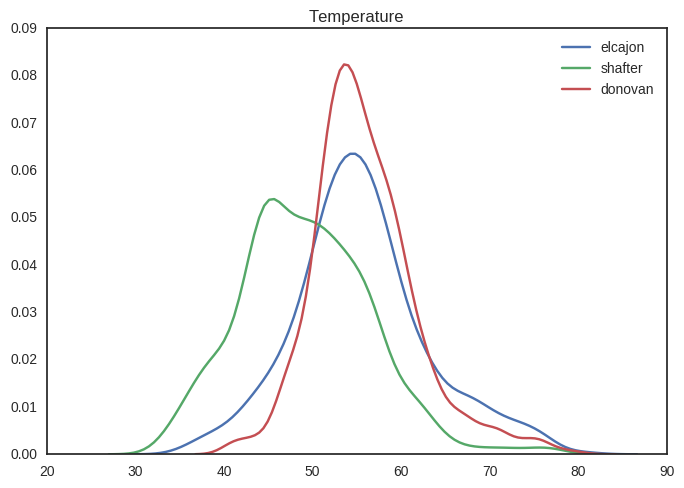

In [40]:
plt.figure()
plt.title('CO')
plot_normal(elcajon, 'co', 'elcajon')
plt.legend(loc='best')
plt.figure()
plt.title('NO2')
plot_normal(elcajon, 'no2', 'elcajon')
plot_normal(shafter, 'no2', 'shafter')
plot_normal(donovan, 'no2', 'donovan')
plt.legend(loc='best')
plt.figure()
plt.title('O3')
plot_normal(elcajon, 'o3', 'elcajon')
plot_normal(shafter, 'o3', 'shafter')
plot_normal(donovan, 'o3', 'donovan')
plt.legend(loc='best')
plt.figure()
plt.title('Temperature')
plot_normal(elcajon, 'temp', 'elcajon')
plot_normal(shafter, 'temp', 'shafter')
plot_normal(donovan, 'temp', 'donovan')
plt.legend(loc='best')
plt.show()